Fragrance Project:
Exploratory Data Analyis, Data Processing, Data Visualization, K Mean Clustring, Linear Regression 

As a fragrance lover, herein, I have performed a comprehensive data analysis of the fragrance database from https://www.kaggle.com/hadihojjati/perfume-preprocess.

Some preprocessing of the data was performed in the above mentioned kaggle page. More data processing are performed in this project to extract the parameters required for this study.

Further analysis included in this project includes:

1-Exploratory Data Analyis, Data Processing, and Data Visualization (to observe the trends)
2-K Mean Clustring (to group the perfumes based on their performance)
3-Linear Regression (to finad the relationships between ratings score and fragrance performance)

The project is ongoing, as there are multiple trends and patterns to explore among the data. The next phase of study would be using notes and accords of the fragrance as basis for a recommendation system.

1-Exploratory Data Analyis, Data Processing, and Data Visualization

Importing Libraries

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [271]:
df= pd.read_csv('perfume.csv')


Describe method gives relevant info for numeric columns 

In [272]:
df.describe()

,date,rating_score,votes,longevity_poor,longevity_weak,longevity_moderate,longevity_long,longevity_very_long,sillage_soft,sillage_moderate,...,clsday_male25under,clsday_female25older,clsday_male25older,clsnight_female25under,clsnight_male25under,clsnight_female25older,clsnight_male25older,Ihaveit,Ihadit,Iwantit
count,51212.000000,51212.000000,51212.000000,51212.00000,51212.000000,51212.000000,51212.000000,51212.000000,51212.000000,51212.000000,...,51212.000000,51212.000000,51212.000000,51212.000000,51212.000000,51212.000000,51212.00000,51212.000000,51212.000000,51212.000000
mean,1526.492775,3.192377,86.440522,1.88323,2.458252,6.665450,6.477974,3.544931,4.870558,10.671171,...,7.973834,19.904007,19.201261,3.078458,7.334101,10.128564,17.54085,62.045556,0.045497,0.486956
std,867.219020,1.630846,362.674407,6.63654,8.809443,27.960634,34.181818,22.603463,17.328103,43.066644,...,20.805762,24.590240,28.763064,7.941041,20.663062,17.056071,27.95558,267.207478,0.370980,2.006863
min,0.000000,0.000000,0.000000,-1.00000,-2.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000
25%,1900.000000,3.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000
50%,2009.000000,3.860000,9.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,6.000000,2.000000,1.000000,1.000000,1.000000,1.00000,5.000000,0.000000,0.000000
75%,2015.000000,4.200000,42.000000,1.00000,2.000000,4.000000,3.000000,2.000000,3.000000,6.000000,...,4.000000,33.000000,28.000000,1.000000,2.000000,13.000000,25.00000,27.250000,0.000000,0.000000
max,9459.000000,5.000000,11188.000000,427.00000,364.000000,1124.000000,1421.000000,1258.000000,906.000000,1815.000000,...,400.000000,200.000000,300.000000,100.000000,400.000000,200.000000,500.00000,8825.000000,44.000000,47.000000


In [131]:
df.head(10)

,brand,title,date,accords,rating_score,votes,longevity_poor,longevity_weak,longevity_moderate,longevity_long,...,notes_12,notes_13,notes_14,notes_15,notes_16,notes_17,notes_18,notes_19,notes_20,gender
0,The-Spirit-of-Dubai,Aamal The Spirit of Dubai for women and men,2017,"woody,earthy,animalic,amber,musky,balsamic",5.00,3,0,0,0,0,...,Base3Moss,Base4Agarwood (Oud),Base5Indian Oud,NaN,NaN,NaN,NaN,NaN,NaN,women
1,Ajmal,Aatifa Ajmal for women and men,2014,"fresh spicy,woody,musky,rose,amber",4.20,10,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,women
2,Al-Jazeera-Perfumes,AA Al-Jazeera Perfumes for women and men,0,"rose,woody,musky,oud,fruity",0.00,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,women
3,Art-of-Scent-Swiss-Perfumes,aarewasser Art of Scent - Swiss Perfumes for w...,2010,"white floral,green,ozonic,fresh,animalic",0.00,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,women
4,Hamidi-Oud-Perfumes,Aaliyah Hamidi Oud & Perfumes for women and men,0,"woody,warm spicy,amber,balsamic,musky",0.00,2,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,women
5,Xyrena,Aaliyah Xyrena for women and men,2015,"powdery,fresh spicy,aromatic,woody,leather,flo...",4.17,10,0,0,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,women
6,Al-Jazeera-Perfumes,AAA Al-Jazeera Perfumes for women and men,0,"white floral,rose,oud,soft spicy,fresh spicy",4.75,4,1,0,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,women
7,source-adage-NYC,c’i'aan source adage NYC for women and men,2016,"woody,aromatic,fresh spicy,green,fresh",3.83,14,0,1,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,women
8,Blackbird,Targa Blackbird for women and men,2015,"balsamic,woody,smoky,fresh spicy,warm spicy",4.10,22,0,2,1,4,...,Middle5Nutmeg,Base0Sandalwood,Base1Agarwood (Oud),Base2Incense,Base3Guaiac Wood,Base4Teak Wood,Base5Cedar,Base6Oak,Base7Vetiver,women
9,Blackbird,Broken Glass Blackbird for women and men,2015,"herbal,aromatic,musky,fresh spicy,warm spicy",3.71,18,0,0,2,1,...,Middle0nan,Base0nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,women


In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51212 entries, 0 to 51211
Data columns (total 86 columns):
brand                       51212 non-null object
title                       51212 non-null object
date                        51212 non-null int64
accords                     50268 non-null object
rating_score                51212 non-null float64
votes                       51212 non-null int64
longevity_poor              51212 non-null int64
longevity_weak              51212 non-null int64
longevity_moderate          51212 non-null int64
longevity_long              51212 non-null int64
longevity_very_long         51212 non-null int64
sillage_soft                51212 non-null int64
sillage_moderate            51212 non-null int64
sillage_heavy               51212 non-null int64
sillage_enormous            51212 non-null int64
clslove                     51212 non-null int64
clslike                     51212 non-null int64
clsdislike                  51212 non-null int64
clsw

In [274]:
df['accords']

0               woody,earthy,animalic,amber,musky,balsamic
1                       fresh spicy,woody,musky,rose,amber
2                              rose,woody,musky,oud,fruity
3                 white floral,green,ozonic,fresh,animalic
4                    woody,warm spicy,amber,balsamic,musky
                               ...                        
51207    balsamic,oud,aromatic,fresh spicy,vanilla,smok...
51208    woody,musky,aromatic,amber,white floral,citrus...
51209    aromatic,green,citrus,woody,fresh spicy,amber,...
51210                 warm spicy,woody,citrus,fruity,sweet
51211    floral,citrus,fresh,aromatic,patchouli,musky,P...
Name: accords, Length: 51212, dtype: object

In [275]:
df.fillna('-1',inplace=True)

In [276]:
df['accords'][0].split(',')

['woody', 'earthy', 'animalic', 'amber', 'musky', 'balsamic']

Each perfume has a number of accords, listed based on their strength. For the purpose of current investigation, we are only keepibg the first accord, which is more potent in the fragrance. The information in notes and accords are overlappping.


In [277]:
accords = df['accords']


In [278]:
accords=accords.apply(lambda x: x.split(',')[0])



In [279]:
df['accords']=accords

In [280]:
accords.nunique()


66

In [281]:
accords


0               woody
1         fresh spicy
2                rose
3        white floral
4               woody
             ...     
51207        balsamic
51208           woody
51209        aromatic
51210      warm spicy
51211          floral
Name: accords, Length: 51212, dtype: object

In [282]:
df.columns


Index(['brand', 'title', 'date', 'accords', 'rating_score', 'votes',
       'longevity_poor', 'longevity_weak', 'longevity_moderate',
       'longevity_long', 'longevity_very_long', 'sillage_soft',
       'sillage_moderate', 'sillage_heavy', 'sillage_enormous', 'clslove',
       'clslike', 'clsdislike', 'clswinter', 'clsspring', 'clssummer',
       'clsautumn', 'clscold', 'clshot', 'clsday', 'clsnight',
       'clslove_female25under', 'clslove_male25under', 'clslove_female25older',
       'clslove_male25older', 'clslike_female25under', 'clslike_male25under',
       'clslike_female25older', 'clslike_male25older',
       'clsdislike_female25under', 'clsdislike_male25under',
       'clsdislike_female25older', 'clsdislike_male25older',
       'clswinter_female25under', 'clswinter_male25under',
       'clswinter_female25older', 'clswinter_male25older',
       'clsspring_female25under', 'clsspring_male25under',
       'clsspring_female25older', 'clsspring_male25older',
       'clssummer_fema

In [283]:
df=df[(df['votes']>200)]

Only fragrances with more than 200 votes are kept, to avaoid biases caused by few data points for fragrances with few number of votes.
We are only keeping the first 5 notes voted as the rest of the notes were not distinguishable by many users, and also dropping love, like, dislike columns which are showing themselves in the rating column. Also, dropping haveit, hadit and wantit columns.

In [284]:
df=df.drop(columns=['date','notes_6', 'notes_7', 'notes_8', 'notes_9', 'notes_10', 'notes_11',
       'notes_12', 'notes_13', 'notes_14', 'notes_15', 'notes_16', 'notes_17',
       'notes_18', 'notes_19', 'notes_20','clslove','clslike', 'clsdislike','Ihaveit', 'Ihadit','Iwantit'])

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4277 entries, 12 to 51195
Data columns (total 64 columns):
brand                       4277 non-null object
title                       4277 non-null object
accords                     4277 non-null object
rating_score                4277 non-null float64
votes                       4277 non-null int64
longevity_poor              4277 non-null int64
longevity_weak              4277 non-null int64
longevity_moderate          4277 non-null int64
longevity_long              4277 non-null int64
longevity_very_long         4277 non-null int64
sillage_soft                4277 non-null int64
sillage_moderate            4277 non-null int64
sillage_heavy               4277 non-null int64
sillage_enormous            4277 non-null int64
clswinter                   4277 non-null int64
clsspring                   4277 non-null int64
clssummer                   4277 non-null int64
clsautumn                   4277 non-null int64
clscold               

In [286]:
df.columns

Index(['brand', 'title', 'accords', 'rating_score', 'votes', 'longevity_poor',
       'longevity_weak', 'longevity_moderate', 'longevity_long',
       'longevity_very_long', 'sillage_soft', 'sillage_moderate',
       'sillage_heavy', 'sillage_enormous', 'clswinter', 'clsspring',
       'clssummer', 'clsautumn', 'clscold', 'clshot', 'clsday', 'clsnight',
       'clslove_female25under', 'clslove_male25under', 'clslove_female25older',
       'clslove_male25older', 'clslike_female25under', 'clslike_male25under',
       'clslike_female25older', 'clslike_male25older',
       'clsdislike_female25under', 'clsdislike_male25under',
       'clsdislike_female25older', 'clsdislike_male25older',
       'clswinter_female25under', 'clswinter_male25under',
       'clswinter_female25older', 'clswinter_male25older',
       'clsspring_female25under', 'clsspring_male25under',
       'clsspring_female25older', 'clsspring_male25older',
       'clssummer_female25under', 'clssummer_male25under',
       'clssum

In [287]:
from sklearn.cluster import KMeans

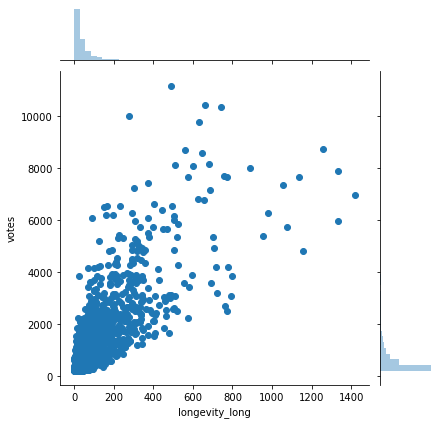

In [294]:
sns.jointplot(x='longevity_long',y='votes',data=df)

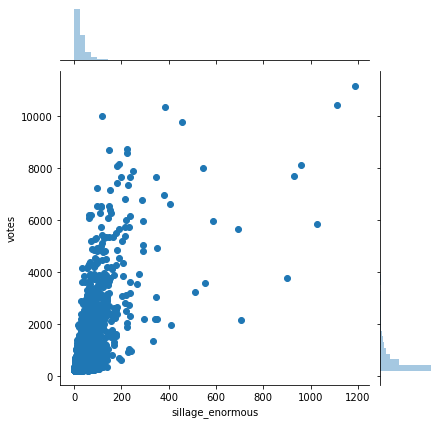

In [295]:
sns.jointplot(x='sillage_enormous',y='votes',data=df)

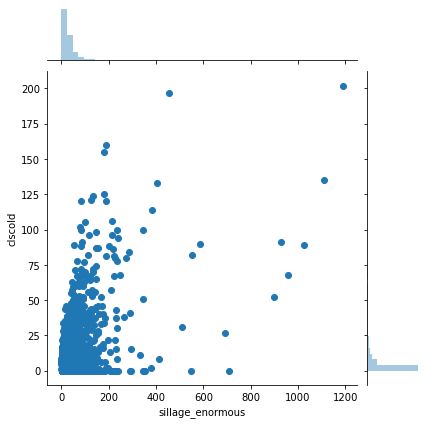

In [296]:
sns.jointplot(x='sillage_enormous',y='clscold',data=df)

Text(0.5, 1.0, 'df.corr()')

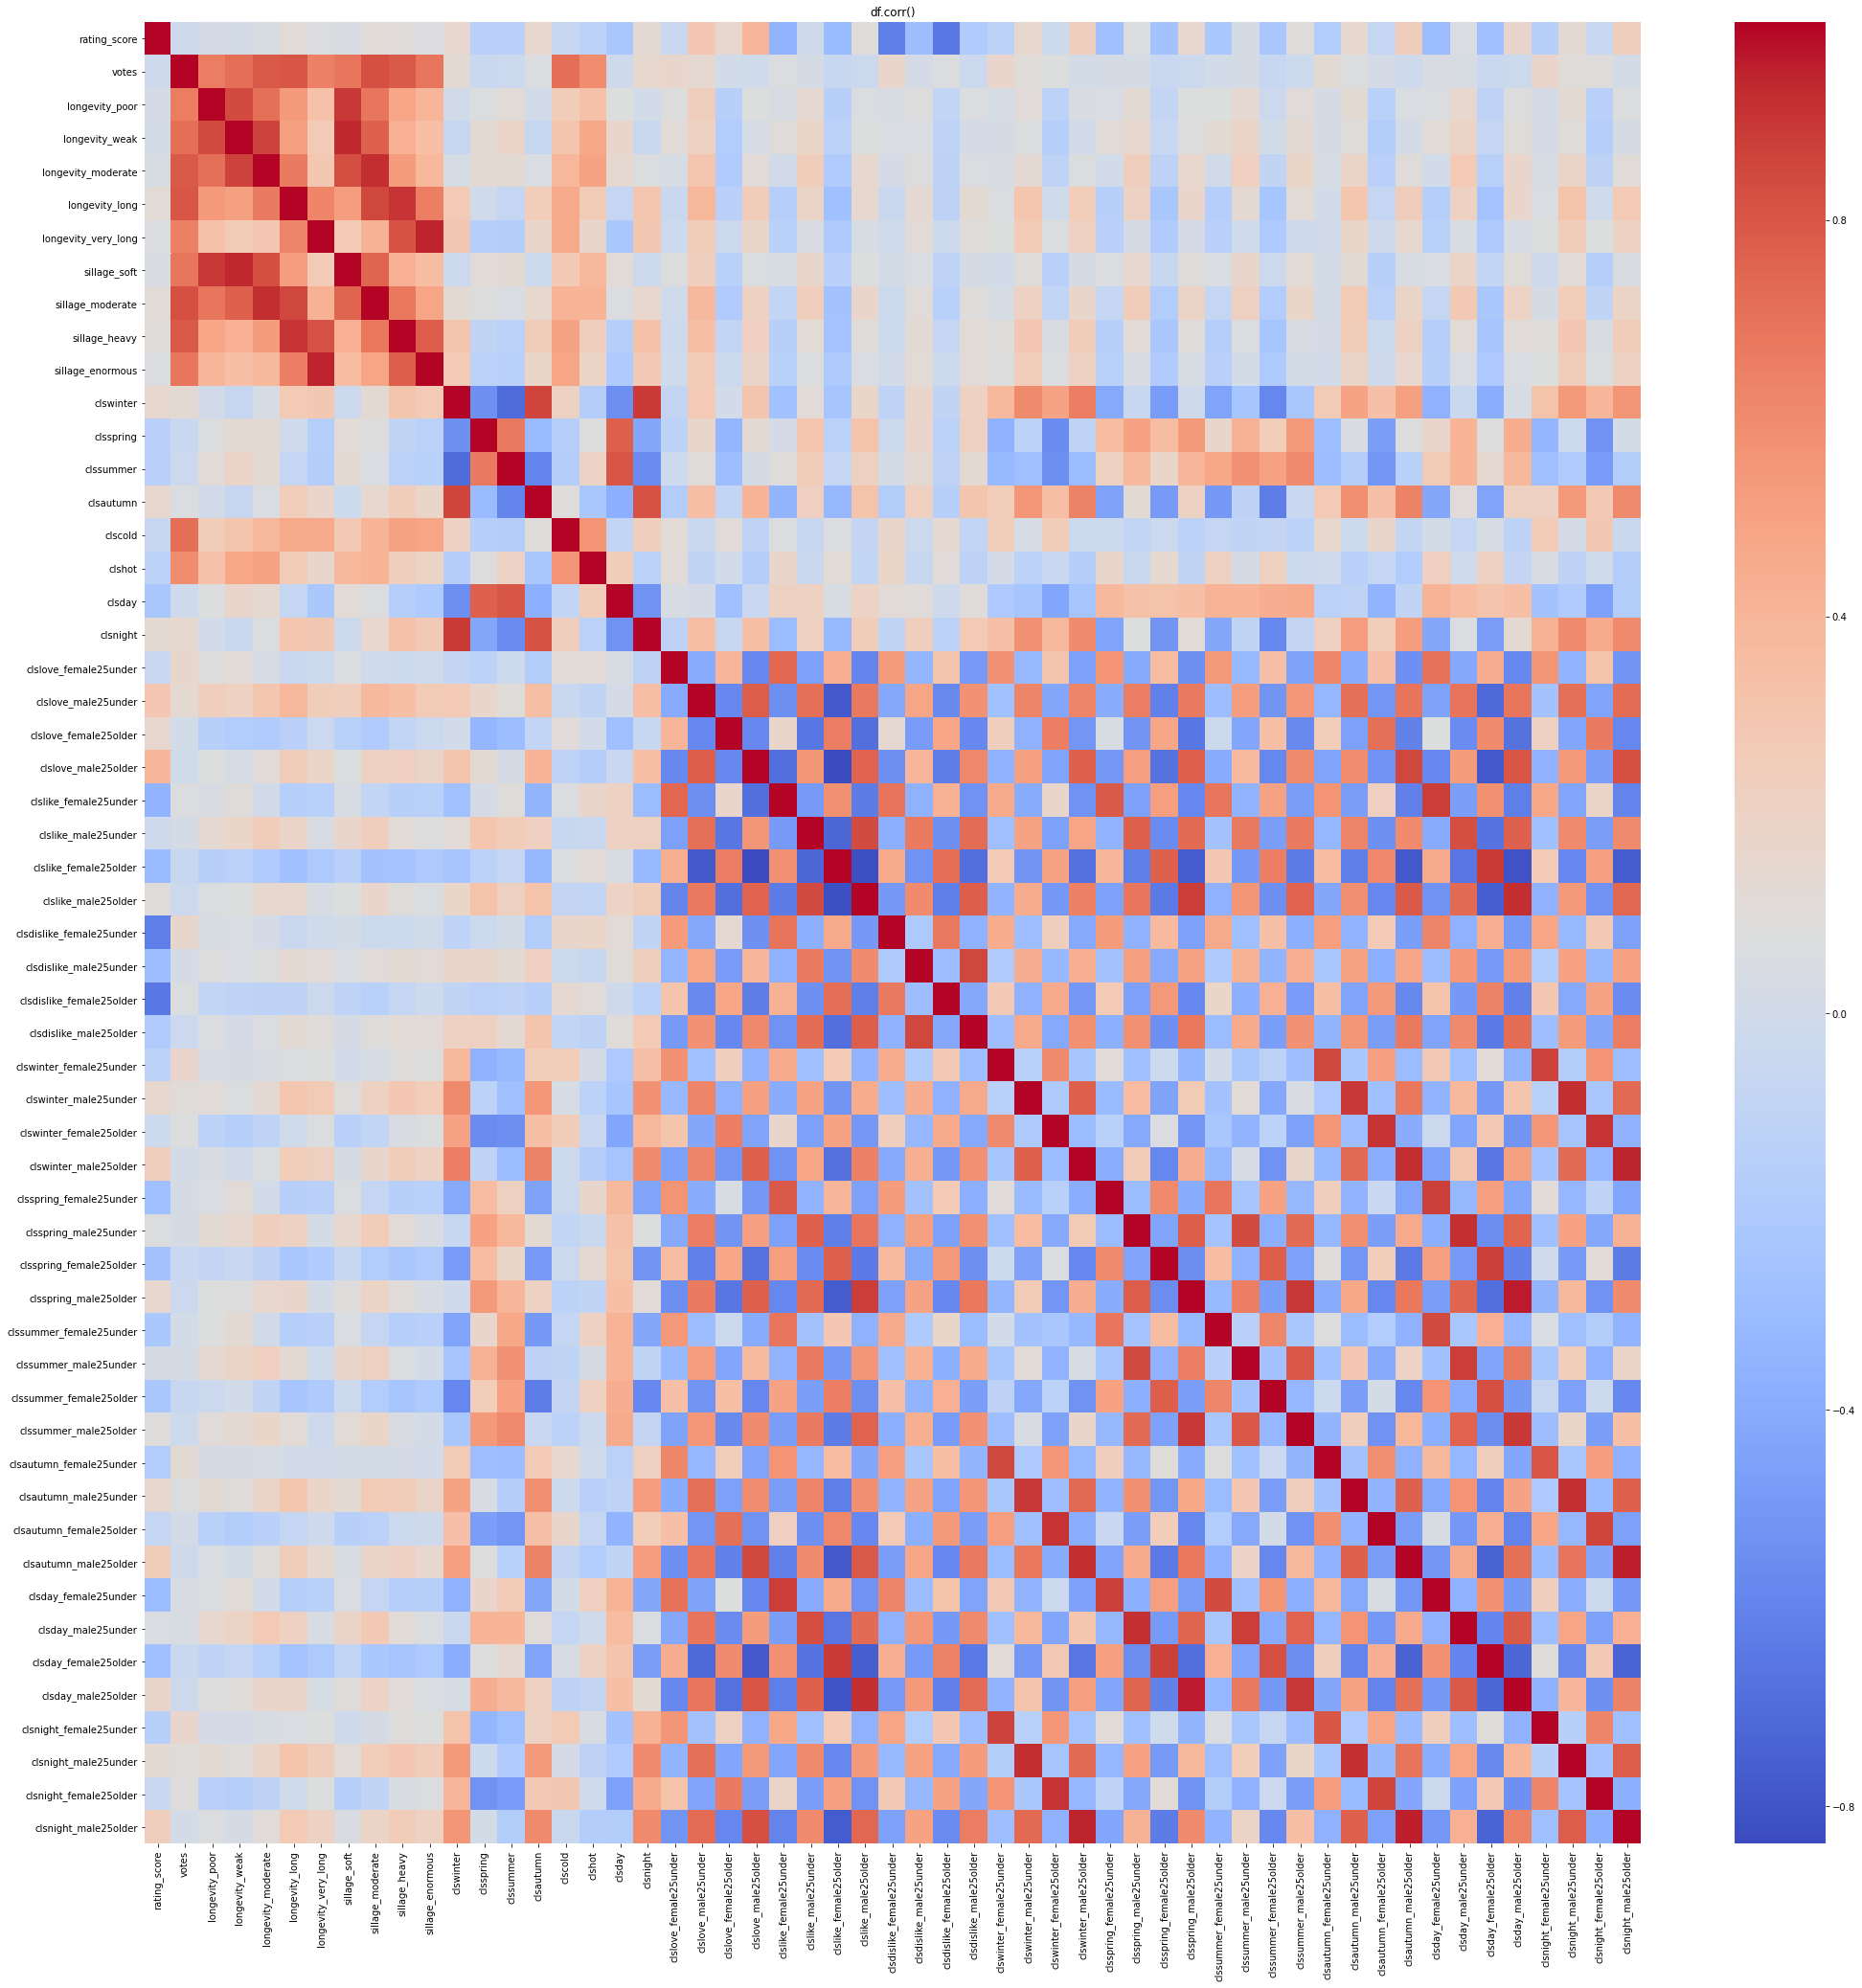

In [297]:
plt.figure(figsize=(35,35))
sns.heatmap(df.corr(),cmap='coolwarm')
plt.title('df.corr()')


The above heatmap is representative of the features that are corrolated. However as rated parameters are directly affected by the number of votes, the rated parameters are normalized by the number of votes as below.

In [298]:
df['longevity_poor']=df['longevity_poor']/df['votes']
df['longevity_weak']=df['longevity_weak']/df['votes']
df['longevity_moderate']=df['longevity_moderate']/df['votes']
df['longevity_long']=df['longevity_long']/df['votes']
df['longevity_very_long']=df['longevity_very_long']/df['votes']
df['sillage_soft']=df['sillage_soft']/df['votes']
df['sillage_moderate']=df['sillage_moderate']/df['votes']
df['sillage_heavy']=df['sillage_heavy']/df['votes']
df['sillage_enormous']=df['sillage_enormous']/df['votes']
df['clswinter']=df['clswinter']/df['votes']
df['clsspring']=df['clsspring']/df['votes']
df['clssummer']=df['clssummer']/df['votes']
df['clsautumn']=df['clsautumn']/df['votes']
df['clscold']=df['clscold']/df['votes']
df['clshot']=df['clshot']/df['votes']
df['clsday']=df['clsday']/df['votes']
df['clsnight']=df['clsnight']/df['votes']
df['clslove_female25under']=df['clslove_female25under']/df['votes']
df['clslove_male25under']=df['clslove_male25under']/df['votes']
df['clslove_female25older']=df['clslove_female25older']/df['votes']
df['clslove_male25older']=df['clslove_male25older']/df['votes']
df['clslike_female25under']=df['clslike_female25under']/df['votes']
df['clslike_male25under']=df['clslike_male25under']/df['votes']
df['clslike_female25older']=df['clslike_female25older']/df['votes']
df['clslike_male25older']=df['clslike_male25older']/df['votes']
df['clsdislike_female25under']=df['clsdislike_female25under']/df['votes']
df['clsdislike_male25under']=df['clsdislike_male25under']/df['votes']
df['clsdislike_female25older']=df['clsdislike_female25older']/df['votes']
df['clsdislike_male25older']=df['clsdislike_male25older']/df['votes']
df['clswinter_female25under']=df['clswinter_female25under']/df['votes']
df['clswinter_male25under']=df['clswinter_male25under']/df['votes']
df['clswinter_female25older']=df['clswinter_female25older']/df['votes']
df['clswinter_male25older']=df['clswinter_male25older']/df['votes']
df['clsspring_female25under']=df['clsspring_female25under']/df['votes']
df['clsspring_male25under']=df['clsspring_male25under']/df['votes']
df['clsspring_female25older']=df['clsspring_female25older']/df['votes']
df['clsspring_male25older']=df['clsspring_male25older']/df['votes']
df['clssummer_female25under']=df['clssummer_female25under']/df['votes']
df['clssummer_male25under']=df['clssummer_male25under']/df['votes']
df['clssummer_female25older']=df['clssummer_female25older']/df['votes']
df['clssummer_male25older']=df['clssummer_male25older']/df['votes']
df['clsautumn_female25under']=df['clsautumn_female25under']/df['votes']
df['clsautumn_male25under']=df['clsautumn_male25under']/df['votes']
df['clsautumn_female25older']=df['clsautumn_female25older']/df['votes']
df['clsautumn_male25older']=df['clsautumn_male25older']/df['votes']
df['clsday_female25under']=df['clsday_female25under']/df['votes']
df['clsday_male25under']=df['clsday_male25under']/df['votes']
df['clsday_female25older']=df['clsday_female25older']/df['votes']
df['clsday_male25older']=df['clsday_male25older']/df['votes']
df['clsnight_female25under']=df['clsnight_female25under']/df['votes']
df['clsnight_male25under']=df['clsnight_male25under']/df['votes']
df['clsnight_female25older']=df['clsnight_female25older']/df['votes']
df['clsnight_male25older']=df['clsnight_male25older']/df['votes']


Text(0.5, 1.0, 'df.corr()')

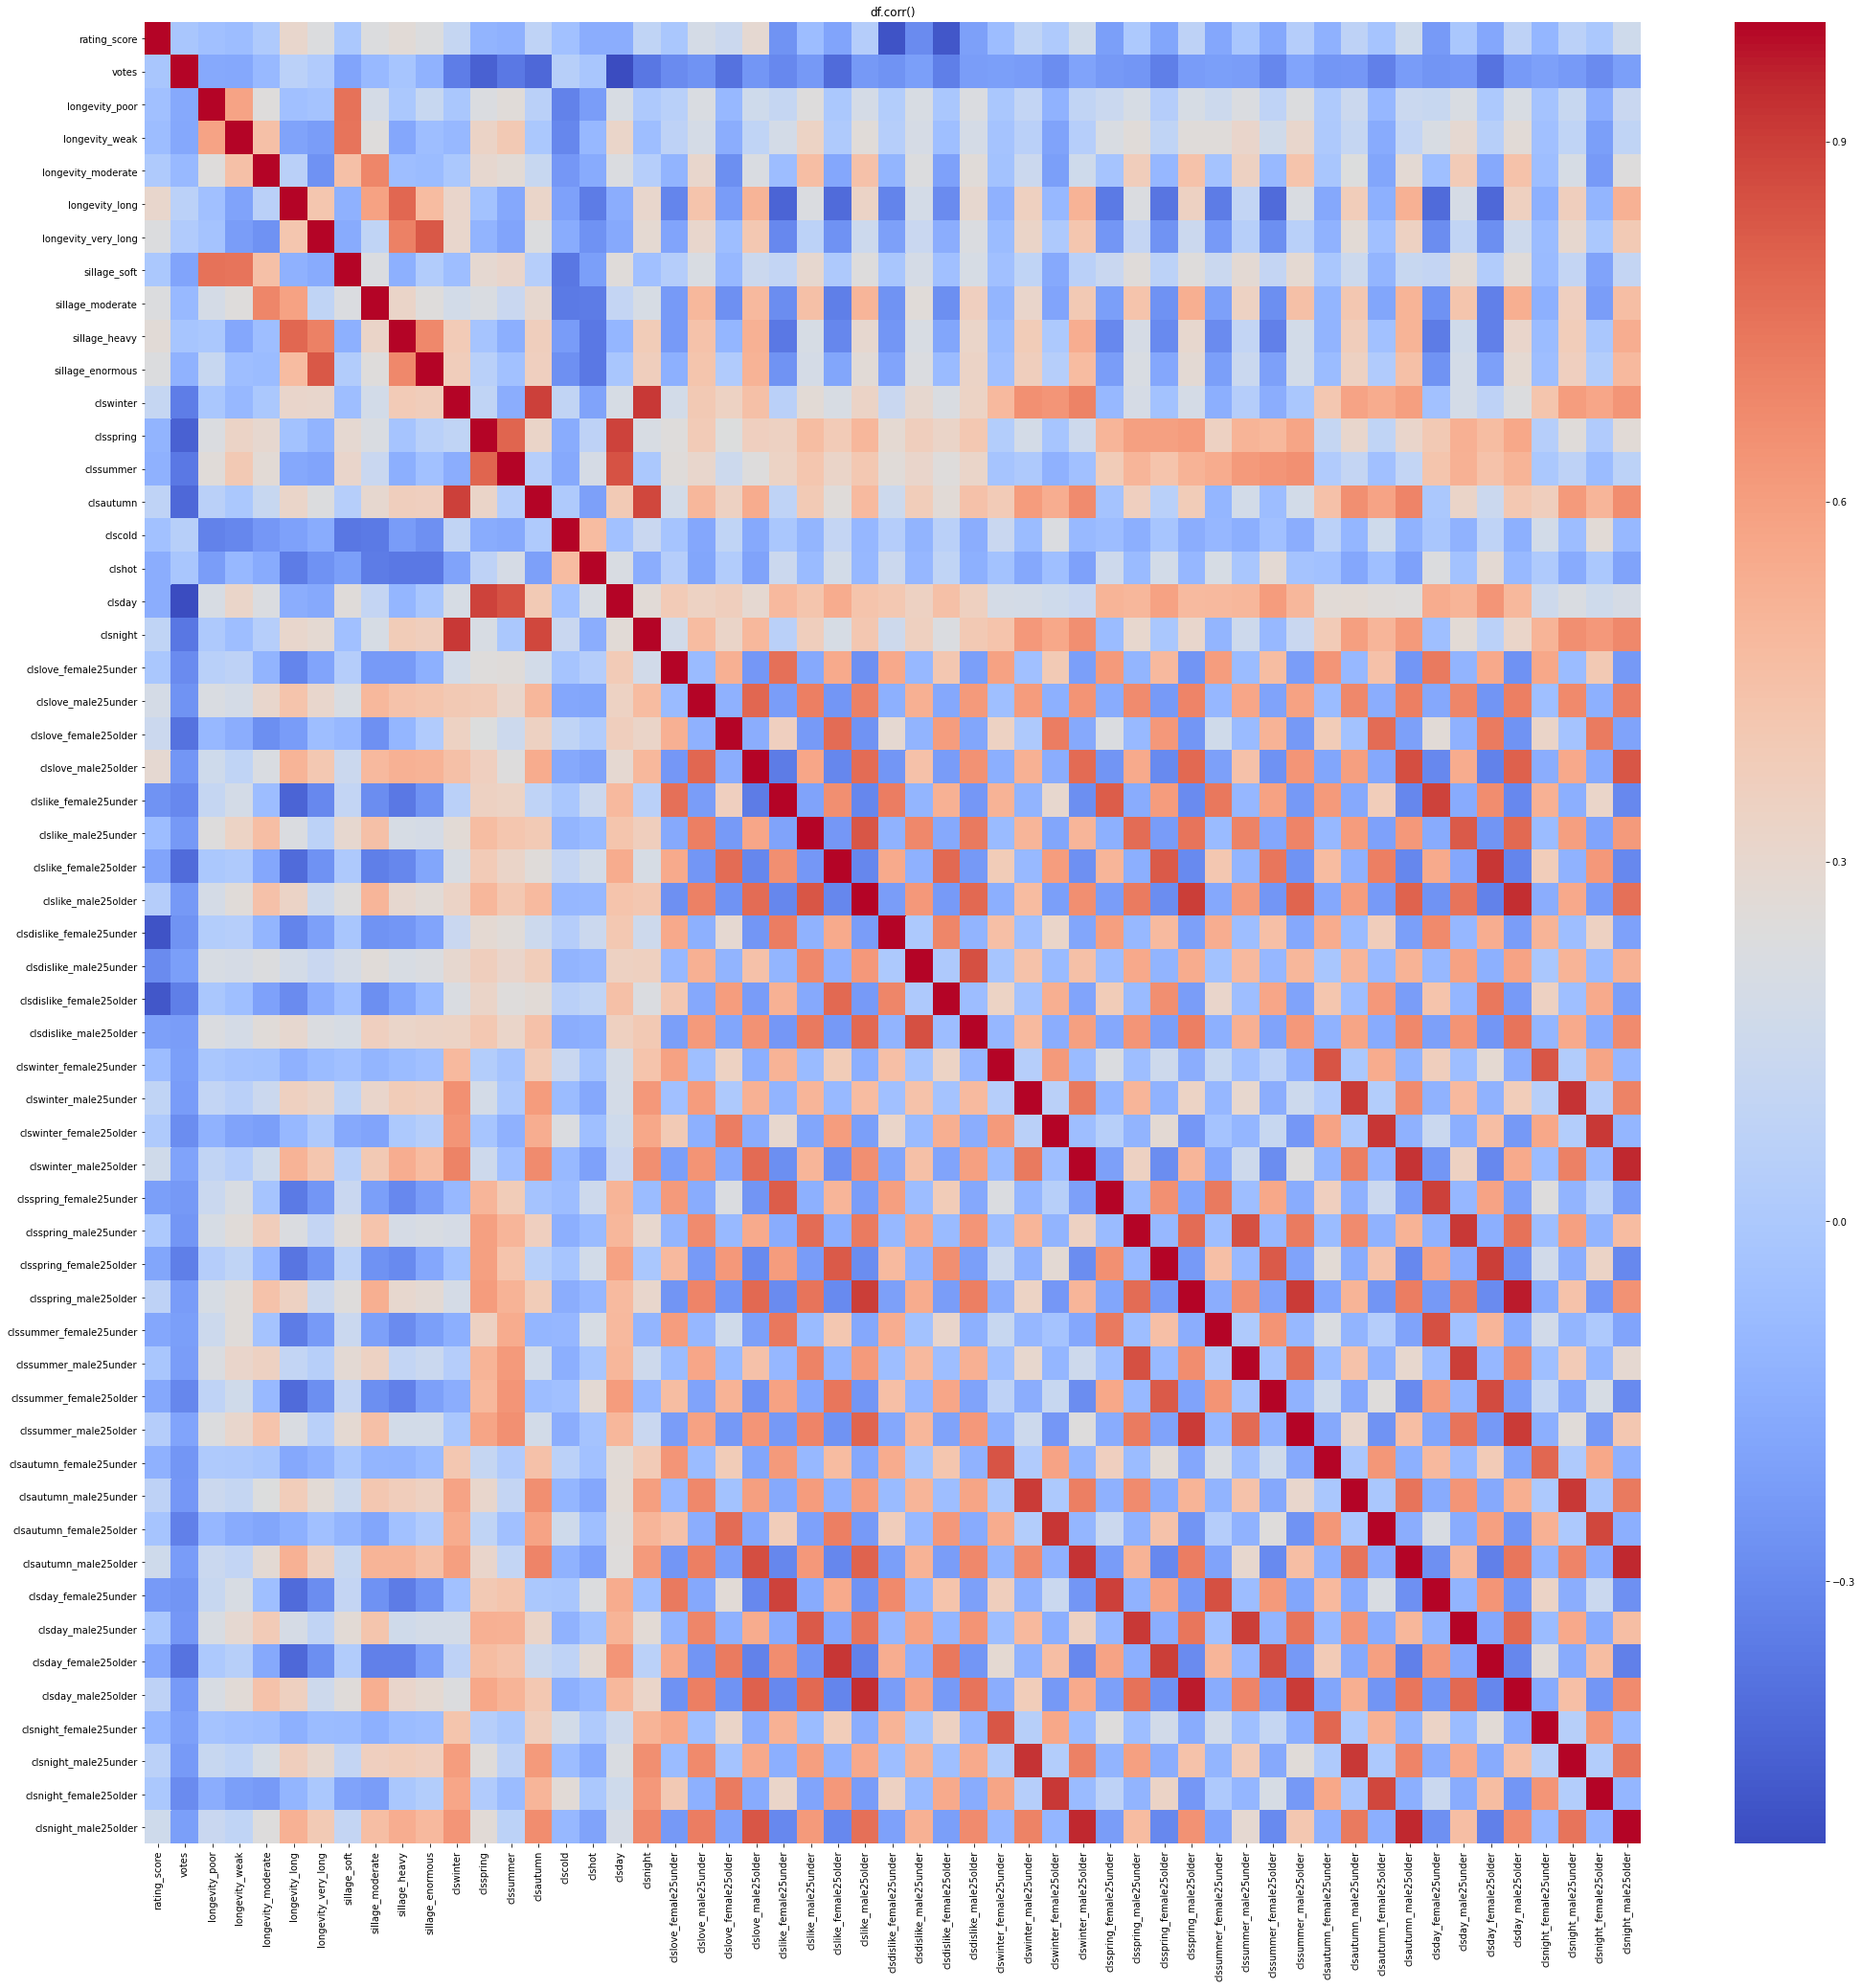

In [299]:
plt.figure(figsize=(35,35))
sns.heatmap(df.corr(),cmap='coolwarm')
plt.title('df.corr()')

For a deeper analysis of the performance parameters corrolated to votes, paiplots specific to them is generated as below.

In [300]:
df_performance=df[['longevity_poor', 'longevity_weak', 'longevity_moderate',
       'longevity_long', 'longevity_very_long', 'sillage_soft',
       'sillage_moderate', 'sillage_heavy', 'sillage_enormous']]

<Figure size 432x288 with 0 Axes>

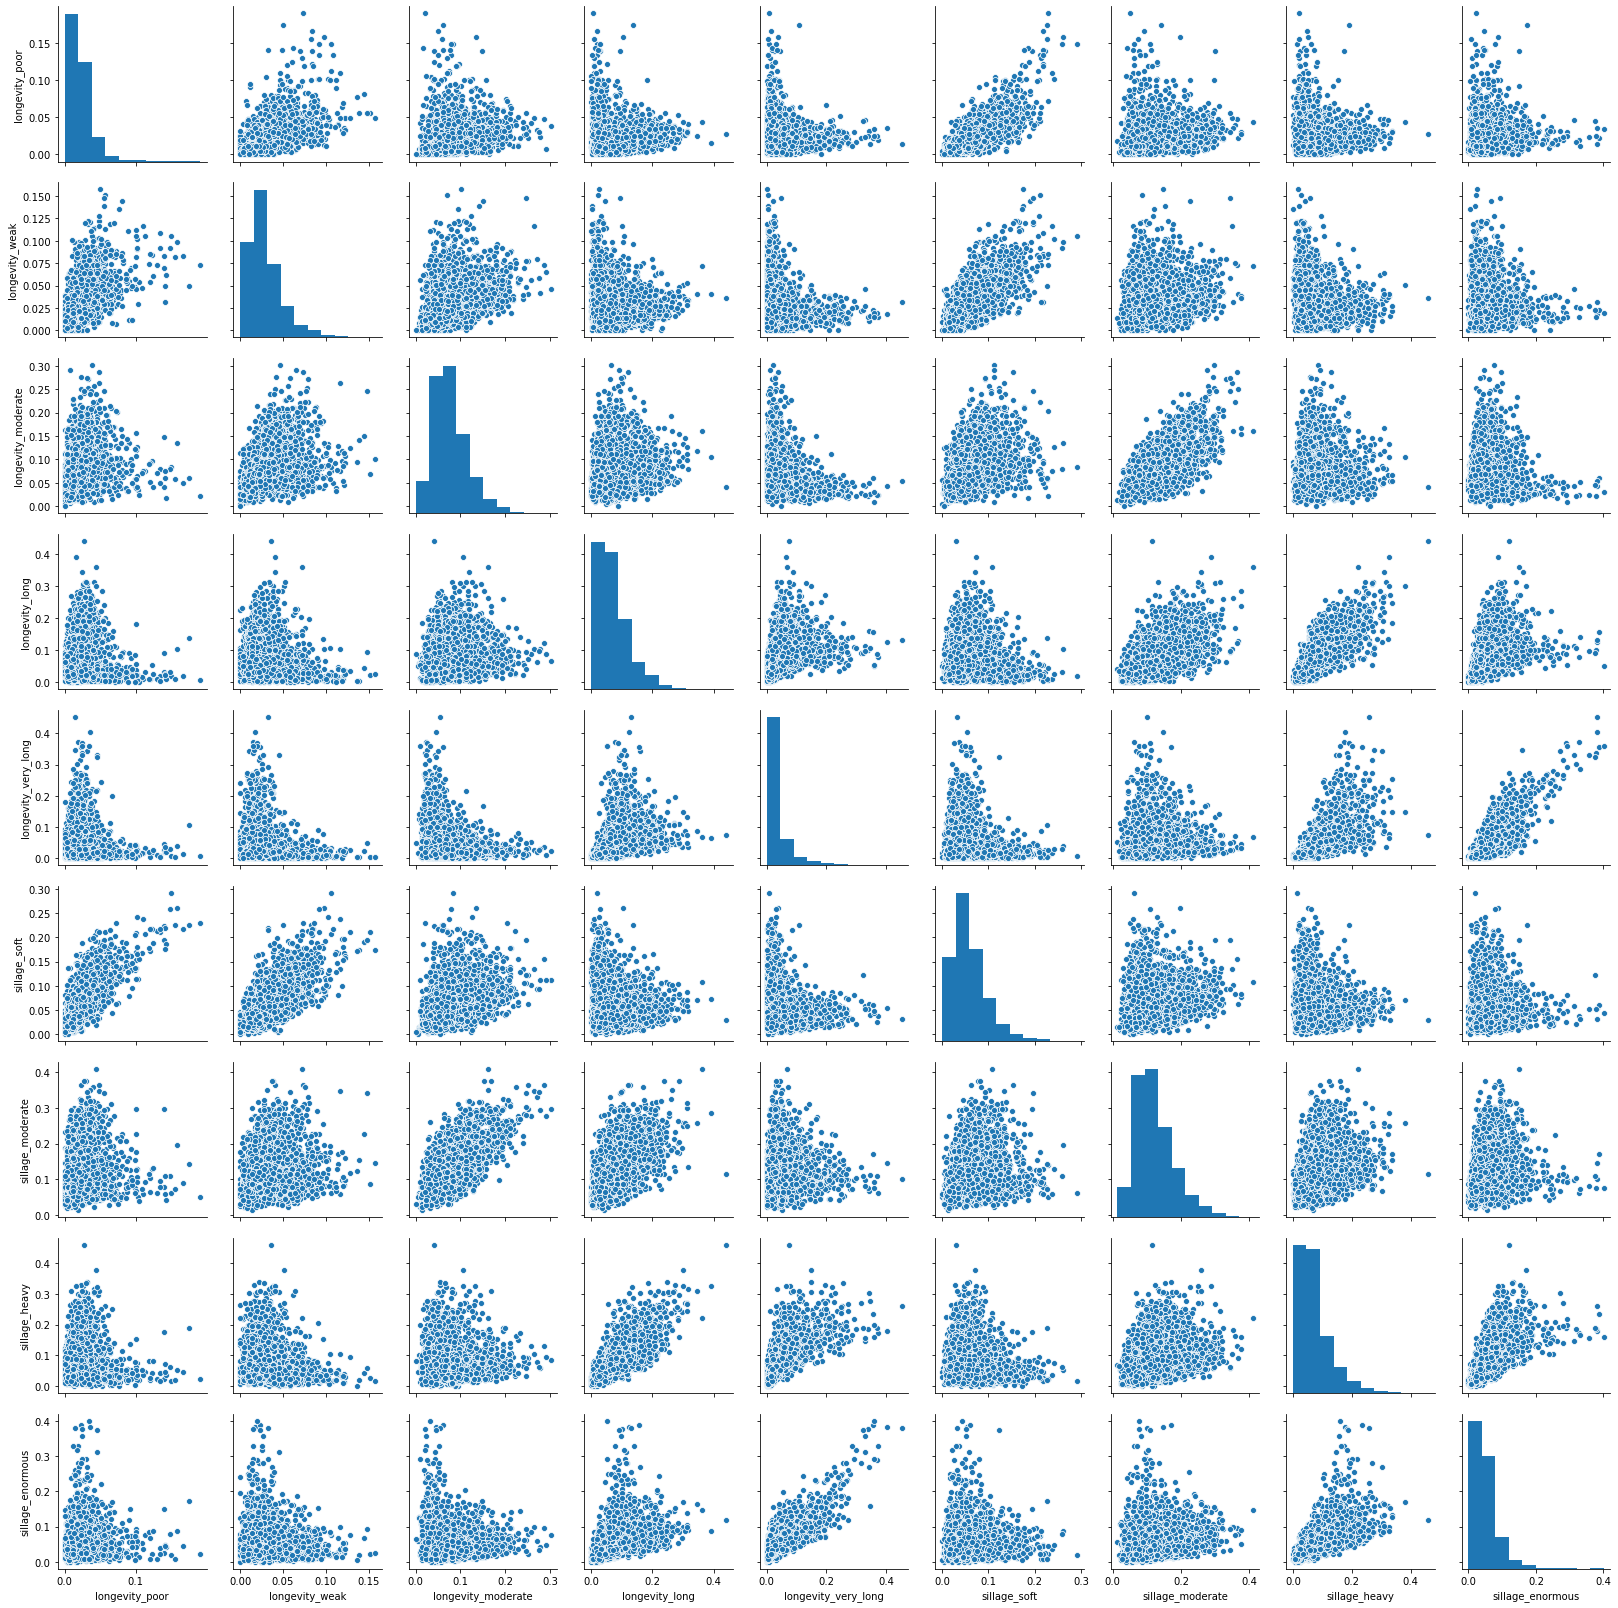

In [301]:
plt.figure()
sns.pairplot(df_performance)


The graph shows that longevity and sillage performance parameters go hand in hand.

In [302]:
df_condition=df[['clswinter', 'clsspring', 'clssummer',
       'clsautumn', 'clscold', 'clshot', 'clsday', 'clsnight']]

<Figure size 432x288 with 0 Axes>

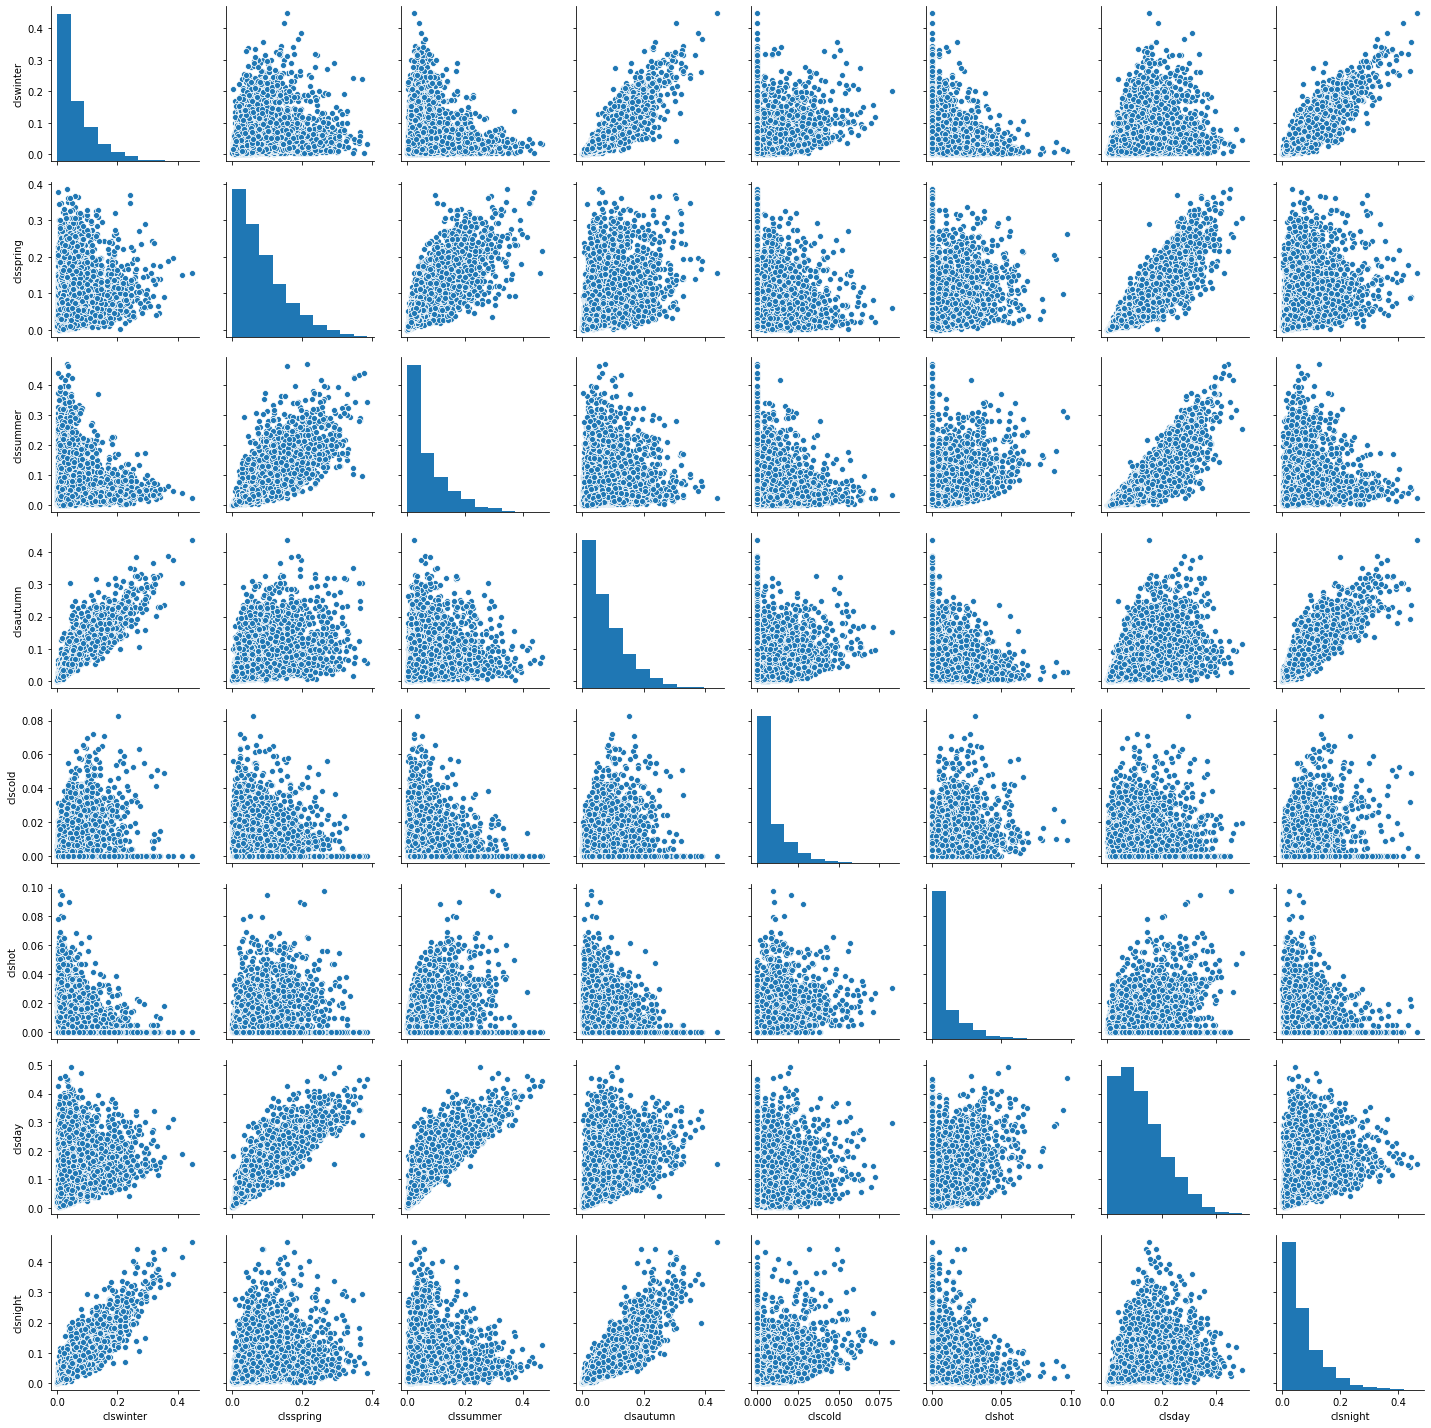

In [303]:
plt.figure()
sns.pairplot(df_condition)

The graph shows the perfume rated as suitable for colder times are corrolated as being suitable for night, and the ones rated as suitable for warmer times are corrolated as being suitable for day.   

2-K Mean Clustring

We are performing two K Mean Clustring classification based on performance.

In [304]:
from sklearn.cluster import KMeans

Longevity and Sillage parameters are reflecting the performance of a fragrance.
Hence, 5 main classes are of performance are assumed (5 clusters) representative of weak, medium and strong, very strong.

In [314]:
kmeans = KMeans(n_clusters=4, random_state=101)

In [315]:
kmeans.fit(df[['longevity_poor', 'longevity_weak', 'longevity_moderate',
       'longevity_long', 'longevity_very_long', 'sillage_soft',
       'sillage_moderate', 'sillage_heavy', 'sillage_enormous']])

KMeans(n_clusters=4, random_state=101)

In [316]:
kmeans.cluster_centers_

array([[0.02385861, 0.02836296, 0.09648263, 0.15389896, 0.04862705,
        0.0599821 , 0.19849264, 0.1257627 , 0.07256527],
       [0.0315808 , 0.04419642, 0.11372165, 0.05179236, 0.02012368,
        0.08956627, 0.14683893, 0.05366207, 0.04517142],
       [0.0207761 , 0.01880707, 0.04204136, 0.11244643, 0.15416566,
        0.04266002, 0.11042614, 0.17266273, 0.13430762],
       [0.01609384, 0.02258725, 0.05768793, 0.04715767, 0.02214203,
        0.04404319, 0.08587445, 0.04928771, 0.03417568]])

In [317]:
kmeans.labels_[:100]

array([3, 3, 1, 2, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1,
       1, 3, 2, 1, 1, 3, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3,
       1, 3, 3, 3, 3, 0, 3, 0, 3, 1, 0, 0, 3, 1, 3, 3, 1, 1, 3, 3, 3, 3,
       0, 3, 3, 1, 1, 2, 0, 3, 1, 0, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1])

Looking at the numbers cluster:
class 0 --> strong
class 1 --> medium
class 2 --> very strong
class 3 --> weak

Keep in mind that if you run the cells with a different random state, the central point and associated labelings would change.

No imaging we are interested to learn about the performance of a specific fragrance. How should this analysis be intrepreted?
Let's day we want to know the performance of "Valentina Pink Valentino for women"

In [318]:
df.loc[df['title']=='Valentina Pink Valentino for women']

,brand,title,accords,rating_score,votes,longevity_poor,longevity_weak,longevity_moderate,longevity_long,longevity_very_long,...,clsnight_female25under,clsnight_male25under,clsnight_female25older,clsnight_male25older,notes_1,notes_2,notes_3,notes_4,notes_5,gender
21,Valentino,Valentina Pink Valentino for women,fruity,4.02,413,0.016949,0.050847,0.11138,0.065375,0.038741,...,0.007264,0.002421,0.033898,0.004843,Top1Blackberry,Top2Musk,Middle0May Rose,Middle1Rose,Middle2Peony,women


In [319]:
kmeans.labels_[21]

1

Different feathures of the perfume are shown in the selected row. This perfume falls in medium performance cluster.

3- Linear Regression

In [323]:
y = df['rating_score']

In [324]:
X = df[['longevity_poor',
       'longevity_weak', 'longevity_moderate', 'longevity_long',
       'longevity_very_long', 'sillage_soft', 'sillage_moderate',
       'sillage_heavy', 'sillage_enormous']]

In [325]:
from sklearn.model_selection import train_test_split

In [326]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [327]:
from sklearn.linear_model import LinearRegression

In [328]:
lm = LinearRegression()

In [329]:
lm.fit(X_train,y_train)

LinearRegression()

In [330]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-3.58921193 -1.58845666 -1.61458298  0.55220047  0.74374829  2.29980585
  1.72174832  0.00498737  0.03591078]


In [331]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

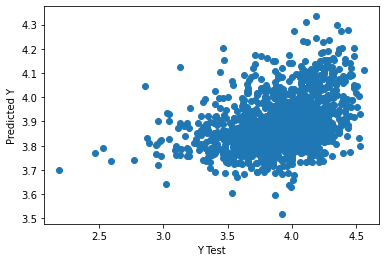

In [332]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

As shown in the above graph on test data, the model is predicting the general rating_score trend. However,there is some over-simplification involved in using a linear regression model.

Now let's look at the rating prediction for our "Valentina Pink Valentino for women".

In [335]:
df.loc[df['title']=='Valentina Pink Valentino for women']

,brand,title,accords,rating_score,votes,longevity_poor,longevity_weak,longevity_moderate,longevity_long,longevity_very_long,...,clsnight_female25under,clsnight_male25under,clsnight_female25older,clsnight_male25older,notes_1,notes_2,notes_3,notes_4,notes_5,gender
21,Valentino,Valentina Pink Valentino for women,fruity,4.02,413,0.016949,0.050847,0.11138,0.065375,0.038741,...,0.007264,0.002421,0.033898,0.004843,Top1Blackberry,Top2Musk,Middle0May Rose,Middle1Rose,Middle2Peony,women


In [374]:
valentina_pink=df.loc[21][['longevity_poor',
       'longevity_weak', 'longevity_moderate', 'longevity_long',
       'longevity_very_long', 'sillage_soft', 'sillage_moderate',
       'sillage_heavy', 'sillage_enormous']].values.reshape(1,-1)

In [375]:
lm.predict(valentina_pink)

array([3.97180338])

The model is predicting the rating score for this perfume accurately.

Evaluating the model

In [357]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.227917319413132
MSE: 0.08555089385034366
RMSE: 0.29249084404531994


We mainly looked at the performance features of the model. There is opportunity to expand this study further based on notes and accords as a basis for recommendation system.